In [2]:
!pip install python-bcb
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install statsmodels
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: ht

In [3]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np
import bcb as bcb
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from bcb import sgs
import linearmodels as lm

In [92]:
consumer_economic_trust_index =sgs.get({'consumer_economic_trust_index':4393}, start='2013-05-01')
industry_economic_trust_index=sgs.get({'industry_economic_trust_index':7341}, start='2013-04-01')
services_economic_trust_index=sgs.get({'services_economic_trust_index':17660}, start='2013-05-01')

**The purpose of the analysis is to check if there is some correlation between the economic trust indexes of consumer, industry and services in Brasil**

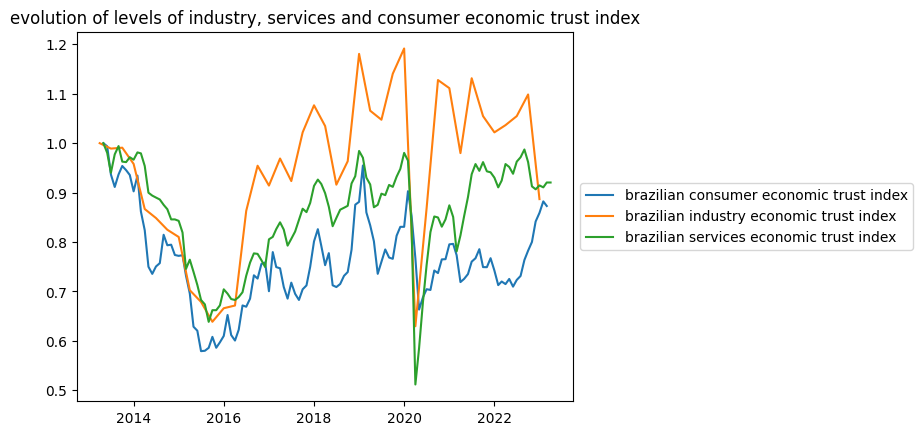

In [96]:
consumer_economic_trust_index_index = consumer_economic_trust_index['consumer_economic_trust_index'] / consumer_economic_trust_index['consumer_economic_trust_index'][0]
industry_economic_trust_index_index = industry_economic_trust_index['industry_economic_trust_index'] / industry_economic_trust_index['industry_economic_trust_index'][0]
services_economic_trust_index_index = services_economic_trust_index['services_economic_trust_index'] / services_economic_trust_index['services_economic_trust_index'][0]

plt.plot(consumer_economic_trust_index_index, label = 'brazilian consumer economic trust index')
plt.plot(industry_economic_trust_index_index, label = 'brazilian industry economic trust index')
plt.plot(services_economic_trust_index_index, label = 'brazilian services economic trust index')
plt.title('evolution of levels of industry, services and consumer economic trust indexes')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

***It is observed that the trust in Brazilian economy didn't recover it's levels registered before the crisis of coronavirus pandemic.***

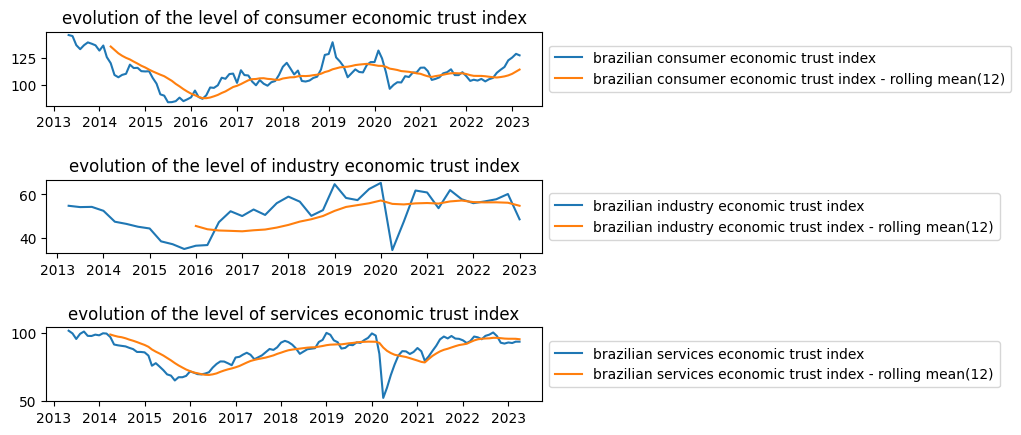

In [99]:
consumer_economic_trust_index['consumer_economic_trust_index_mm12'] = consumer_economic_trust_index['consumer_economic_trust_index'].rolling(window=12).mean()
industry_economic_trust_index['industry_economic_trust_index_mm12'] = industry_economic_trust_index['industry_economic_trust_index'].rolling(window=12).mean()
services_economic_trust_index['services_economic_trust_index_mm12'] = services_economic_trust_index['services_economic_trust_index'].rolling(window=12).mean()
plt.subplots_adjust(hspace=1.0, wspace=0.2)
plt.subplot(311)
plt.plot(consumer_economic_trust_index['consumer_economic_trust_index'], label='brazilian consumer economic trust index')
plt.plot(consumer_economic_trust_index['consumer_economic_trust_index_mm12'], label='brazilian consumer economic trust index - rolling mean(12)')
plt.title('evolution of the level of consumer economic trust index')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(312)
plt.plot(industry_economic_trust_index['industry_economic_trust_index'], label='brazilian industry economic trust index')
plt.plot(industry_economic_trust_index['industry_economic_trust_index_mm12'], label='brazilian industry economic trust index - rolling mean(12)')
plt.title('evolution of the level of industry economic trust index')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.subplot(313)
plt.plot(services_economic_trust_index['services_economic_trust_index'], label='brazilian services economic trust index')
plt.plot(services_economic_trust_index['services_economic_trust_index_mm12'], label='brazilian services economic trust index - rolling mean(12)')
plt.title('evolution of the level of services economic trust index')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

***The use of rolling means helps to observe the changes in the indexes despite of the seasonal variations***

In [101]:
consumer_economic_trust_index.drop(columns={'consumer_economic_trust_index_mm12'}, inplace=True)
industry_economic_trust_index.drop(columns={'industry_economic_trust_index_mm12'}, inplace=True)
services_economic_trust_index.drop(columns={'services_economic_trust_index_mm12'}, inplace=True)

consumer_economic_trust_index['Date'] = consumer_economic_trust_index.index
industry_economic_trust_index['Date'] = industry_economic_trust_index.index
services_economic_trust_index['Date'] = services_economic_trust_index.index

consumer_economic_trust_index['Date'] = pd.to_datetime(consumer_economic_trust_index['Date'])
industry_economic_trust_index['Date'] = pd.to_datetime(industry_economic_trust_index['Date'])
services_economic_trust_index['Date'] = pd.to_datetime(services_economic_trust_index['Date'])

dummies_consumer_economic_trust = pd.get_dummies(consumer_economic_trust_index['Date'].dt.month, prefix='Month')
dummies_industry_economic_trust = pd.get_dummies(industry_economic_trust_index['Date'].dt.month, prefix='Month')
dummies_services_economic_trust_index = pd.get_dummies(services_economic_trust_index['Date'].dt.month, prefix='Month')

consumer_economic_trust_index = consumer_economic_trust_index.join(dummies_consumer_economic_trust)
industry_economic_trust_index = industry_economic_trust_index.join(dummies_industry_economic_trust)
services_economic_trust_index = services_economic_trust_index.join(dummies_services_economic_trust_index)

In [102]:
consumer_economic_trust_index_model=smf.ols(formula='consumer_economic_trust_index ~ Month_2 + Month_3 + Month_4 + Month_5 + Month_6 + Month_7 + Month_8 + Month_9 + Month_10 + Month_11 + Month_12', data= consumer_economic_trust_index)
industry_economic_trust_index_model=smf.ols(formula='industry_economic_trust_index ~ Month_4 + Month_7 + Month_10', data= industry_economic_trust_index)
services_economic_trust_index_model=smf.ols(formula='services_economic_trust_index ~ Month_2 + Month_3 + Month_4 + Month_5 + Month_6 + Month_7 + Month_8 + Month_9 + Month_10 + Month_11 + Month_12', data= services_economic_trust_index)

consumer_economic_trust_index_model_results=consumer_economic_trust_index_model.fit()
industry_economic_trust_index_model_results=industry_economic_trust_index_model.fit()
services_economic_trust_index_model_results=services_economic_trust_index_model.fit()


In [103]:
consumer_economic_trust_index_model_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     consumer_economic_trust_index   R-squared:                       0.097
Model:                                       OLS   Adj. R-squared:                  0.005
Method:                            Least Squares   F-statistic:                     1.050
Date:                           Wed, 17 May 2023   Prob (F-statistic):              0.409
Time:                                   19:01:52   Log-Likelihood:                -469.75
No. Observations:                            119   AIC:                             963.5
Df Residuals:                                107   BIC:                             996.9
Df Model:                                     11                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    115.2410      4.181     27.566      0.000     106.954     123.528
Month_2        4.6710      5.912      0.790      0.431      -7.049      16.391
Month_3       -0.9890      5.912     -0.167      0.867     -12.709      10.731
Month_4       -7.3054      6.074     -1.203      0.232     -19.347       4.736
Month_5       -7.1750      5.912     -1.214      0.228     -18.895       4.545
Month_6       -8.8580      5.912     -1.498      0.137     -20.578       2.862
Month_7       -8.5330      5.912     -1.443      0.152     -20.253       3.187
Month_8       -8.2310      5.912     -1.392      0.167     -19.951       3.489
Month_9       -5.1140      5.912     -0.865      0.389     -16.834       6.606
Month_10      -4.8850      5.912     -0.826      0.410     -16.605       6.835
Month_11      -2.7670      5.912     -0.468      0.641     -14.487       8.953
Month_12       0.0080      5.912      0.001      0.999     -11.712      11.728
==============================================================================
Omnibus:                        7.461   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.024   Jarque-Bera (JB):                8.623
Skew:                           0.387   Prob(JB):                       0.0134
Kurtosis:                       4.068   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [105]:
industry_economic_trust_index_model_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     industry_economic_trust_index   R-squared:                       0.057
Model:                                       OLS   Adj. R-squared:                 -0.021
Method:                            Least Squares   F-statistic:                    0.7283
Date:                           Wed, 17 May 2023   Prob (F-statistic):              0.542
Time:                                   19:02:11   Log-Likelihood:                -140.27
No. Observations:                             40   AIC:                             288.5
Df Residuals:                                 36   BIC:                             295.3
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     53.8000      2.689     20.006      0.000      48.346      59.254
Month_4       -4.7200      3.803     -1.241      0.223     -12.433       2.993
Month_7       -2.7200      3.803     -0.715      0.479     -10.433       4.993
Month_10      -0.0100      3.803     -0.003      0.998      -7.723       7.703
==============================================================================
Omnibus:                        3.431   Durbin-Watson:                   0.664
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                3.210
Skew:                          -0.652   Prob(JB):                        0.201
Kurtosis:                       2.524   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
services_economic_trust_index_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     services_economic_trust_index   R-squared:                       0.043
Model:                                       OLS   Adj. R-squared:                 -0.055
Method:                            Least Squares   F-statistic:                    0.4381
Date:                           Wed, 17 May 2023   Prob (F-statistic):              0.936
Time:                                   19:02:17   Log-Likelihood:                -446.41
No. Observations:                            120   AIC:                             916.8
Df Residuals:                                108   BIC:                             950.3
Df Model:                                     11                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.7700      3.329     27.270      0.000      84.172      97.368
Month_2       -0.7800      4.707     -0.166      0.869     -10.111       8.551
Month_3       -3.8200      4.707     -0.812      0.419     -13.151       5.511
Month_4       -6.6900      4.707     -1.421      0.158     -16.021       2.641
Month_5       -6.4300      4.707     -1.366      0.175     -15.761       2.901
Month_6       -6.3500      4.707     -1.349      0.180     -15.681       2.981
Month_7       -4.7400      4.707     -1.007      0.316     -14.071       4.591
Month_8       -2.9500      4.707     -0.627      0.532     -12.281       6.381
Month_9       -2.2300      4.707     -0.474      0.637     -11.561       7.101
Month_10      -2.2800      4.707     -0.484      0.629     -11.611       7.051
Month_11      -2.9100      4.707     -0.618      0.538     -12.241       6.421
Month_12      -2.2800      4.707     -0.484      0.629     -11.611       7.051
==============================================================================
Omnibus:                       12.075   Durbin-Watson:                   0.159
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.228
Skew:                          -0.812   Prob(JB):                      0.00134
Kurtosis:                       3.099   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***Based on the given results, it wasn't possible to capture any evidence of seasonal effect in any of the economic indexes***

In [137]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(2).mean()
    rolstd = timeseries.rolling(2).std()

    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    axs[0].plot(timeseries, color='blue', label='Original')
    axs[0].plot(rolmean, color='red', label='Rolling Mean')
    axs[0].plot(rolstd, color='black', label='Rolling Std')
    axs[0].legend(loc='best')
    axs[0].set_title('Stationarity Test') #or 'unit root' test

    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

    plt.tight_layout()

    axs[1].axis('off')
    axs[1].text(0, 0.5, dfoutput.to_string(), fontsize=10, verticalalignment='center')

    plt.show()

***It is necessary to test wether any of the variables hasn't a unit root, which is a condition to verifiy if the estimator of the coefficients may be biased or not.***

Results of Dickey-Fuller Test:
Test Statistic                  -2.059654
p-value                          0.261044
#Lags Used                      12.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


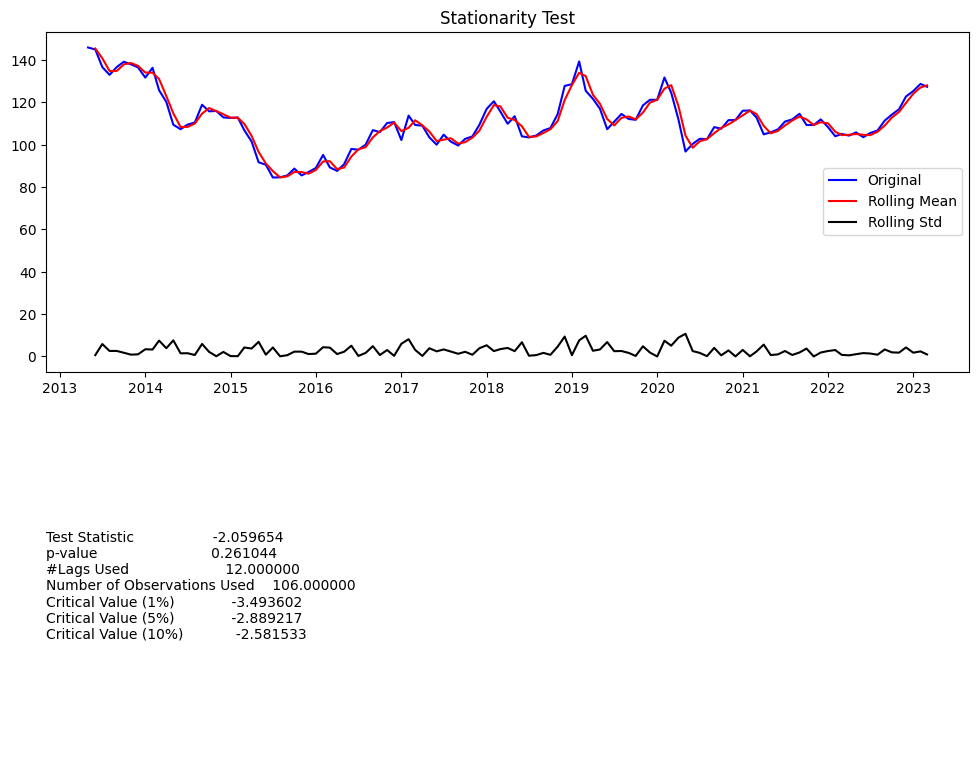

In [138]:
test_stationarity(consumer_economic_trust_index['consumer_economic_trust_index'])

Results of Dickey-Fuller Test:
Test Statistic                 -1.657016
p-value                         0.453384
#Lags Used                      2.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


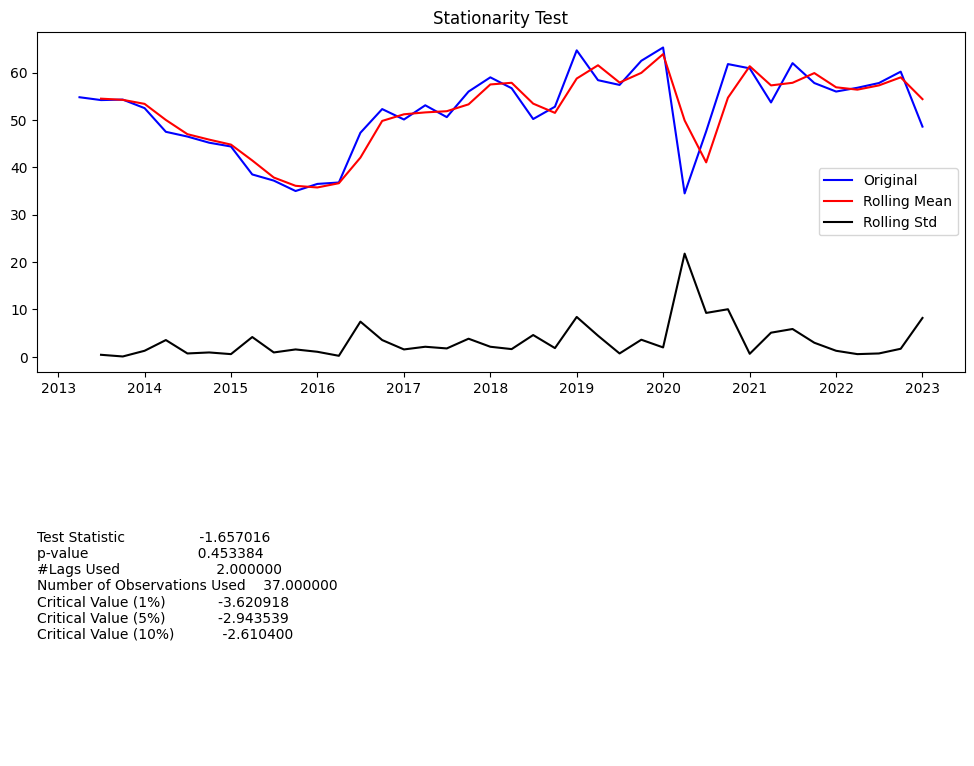

In [139]:
test_stationarity(industry_economic_trust_index['industry_economic_trust_index'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.268849
p-value                          0.016330
#Lags Used                       1.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


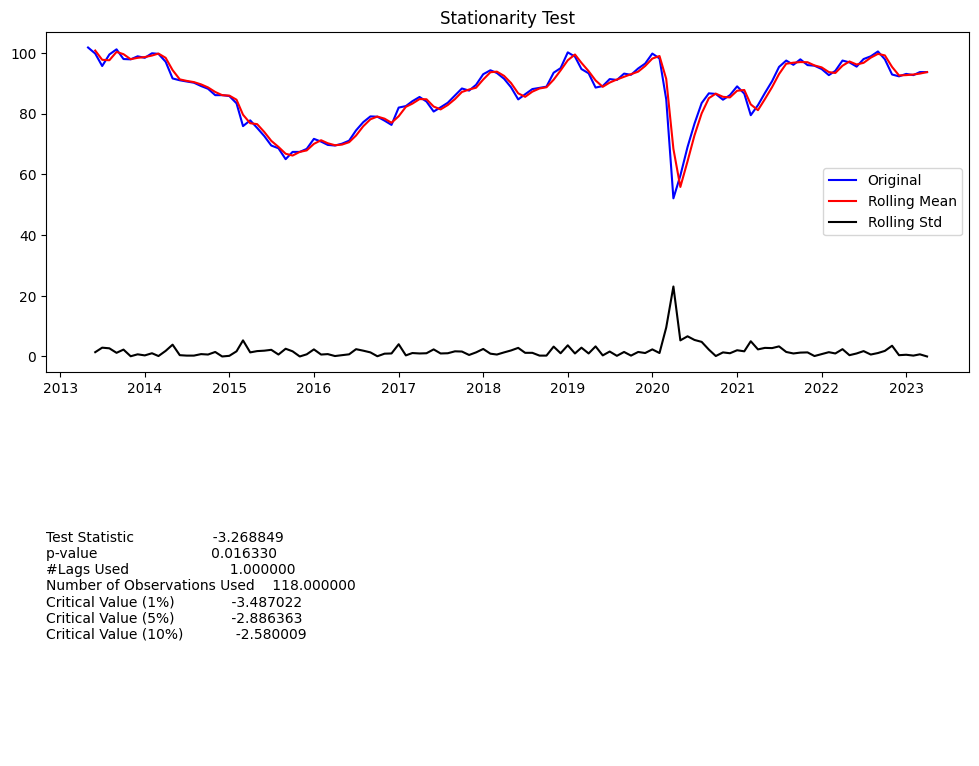

In [140]:
test_stationarity(services_economic_trust_index['services_economic_trust_index'])

In [141]:
consumer_economic_trust=pd.DataFrame(consumer_economic_trust_index['consumer_economic_trust_index'])
industry_economic_trust=pd.DataFrame(industry_economic_trust_index['industry_economic_trust_index'])
services_economic_trust=pd.DataFrame(services_economic_trust_index['services_economic_trust_index'])

In [142]:
data=pd.merge(consumer_economic_trust,industry_economic_trust, on='Date', how='inner')
data=pd.merge(data,services_economic_trust, on='Date', how='inner')

In [113]:
model_1=smf.ols(formula='consumer_economic_trust_index ~ industry_economic_trust_index + services_economic_trust_index', data=data)
results1=model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     consumer_economic_trust_index   R-squared:                       0.442
Model:                                       OLS   Adj. R-squared:                  0.411
Method:                            Least Squares   F-statistic:                     14.23
Date:                           Wed, 17 May 2023   Prob (F-statistic):           2.79e-05
Time:                                   19:10:41   Log-Likelihood:                -141.34
No. Observations:                             39   AIC:                             288.7
Df Residuals:                                 36   BIC:                             293.7
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        44.5853     12.391      3.598      0.001      19.456      69.715
industry_economic_trust_index    -0.0367      0.303     -0.121      0.904      -0.651       0.578
services_economic_trust_index     0.7735      0.237      3.264      0.002       0.293       1.254
==============================================================================
Omnibus:                       12.236   Durbin-Watson:                   0.922
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.126
Skew:                           1.167   Prob(JB):                      0.00233
Kurtosis:                       4.420   Cond. No.                         838.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
model_2=smf.ols(formula='industry_economic_trust_index ~ consumer_economic_trust_index + services_economic_trust_index', data=data)
results2=model_2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     industry_economic_trust_index   R-squared:                       0.648
Model:                                       OLS   Adj. R-squared:                  0.628
Method:                            Least Squares   F-statistic:                     33.09
Date:                           Wed, 17 May 2023   Prob (F-statistic):           6.99e-09
Time:                                   19:11:33   Log-Likelihood:                -118.00
No. Observations:                             39   AIC:                             242.0
Df Residuals:                                 36   BIC:                             247.0
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -2.4848      7.931     -0.313      0.756     -18.570      13.601
consumer_economic_trust_index    -0.0111      0.092     -0.121      0.904      -0.197       0.175
services_economic_trust_index     0.6374      0.103      6.161      0.000       0.428       0.847
==============================================================================
Omnibus:                        2.021   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.364   Jarque-Bera (JB):                1.314
Skew:                          -0.166   Prob(JB):                        0.518
Kurtosis:                       2.164   Cond. No.                     1.35e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
model_3=smf.ols(formula='services_economic_trust_index ~ industry_economic_trust_index + consumer_economic_trust_index', data=data)
results3=model_3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     services_economic_trust_index   R-squared:                       0.728
Model:                                       OLS   Adj. R-squared:                  0.713
Method:                            Least Squares   F-statistic:                     48.19
Date:                           Wed, 17 May 2023   Prob (F-statistic):           6.62e-11
Time:                                   19:12:38   Log-Likelihood:                -122.56
No. Observations:                             39   AIC:                             251.1
Df Residuals:                                 36   BIC:                             256.1
Df Model:                                      2                                         
Covariance Type:                       nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        12.9140      8.663      1.491      0.145      -4.655      30.483
industry_economic_trust_index     0.8051      0.131      6.161      0.000       0.540       1.070
consumer_economic_trust_index     0.2952      0.090      3.264      0.002       0.112       0.479
==============================================================================
Omnibus:                       18.885   Durbin-Watson:                   0.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.311
Skew:                          -1.244   Prob(JB):                     9.63e-08
Kurtosis:                       6.700   Cond. No.                     1.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

***The model which proved to have the bigger power of explanation is the third model - the movements of the services sector economic trust is associated with movements in the economics trust of the industry and of the consumers***

In [116]:
residuals1=results1.resid
residuals2=results2.resid
residuals3=results3.resid

Results of Dickey-Fuller Test:
Test Statistic                 -3.834312
p-value                         0.002575
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


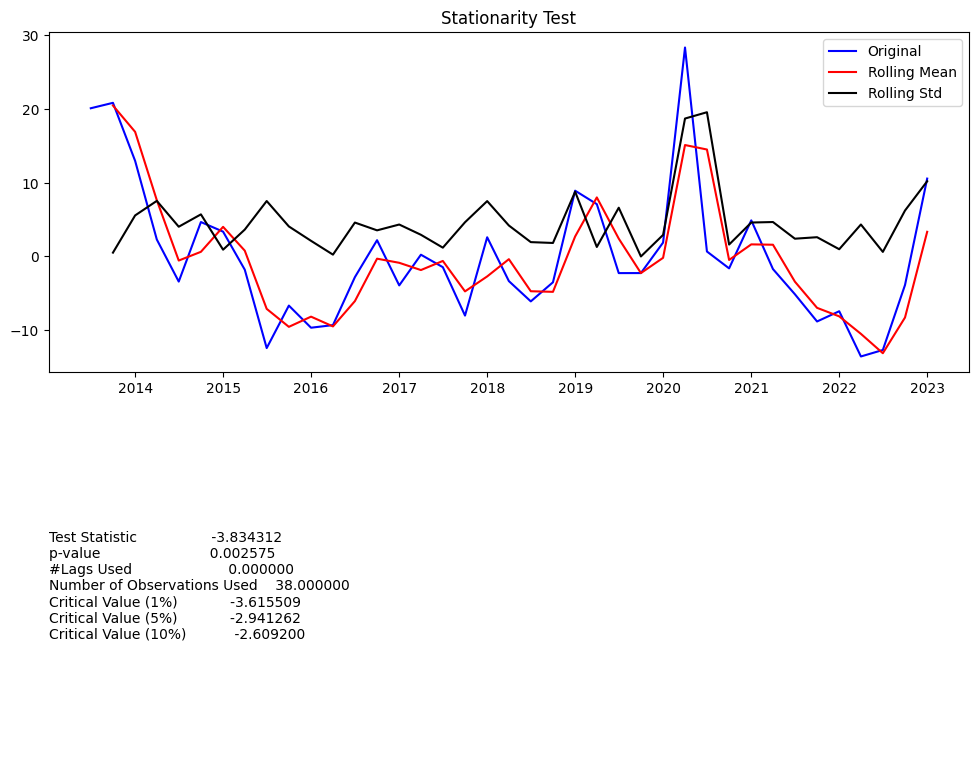

In [117]:
test_stationarity(residuals1)

Results of Dickey-Fuller Test:
Test Statistic                 -1.856829
p-value                         0.352634
#Lags Used                      0.000000
Number of Observations Used    38.000000
Critical Value (1%)            -3.615509
Critical Value (5%)            -2.941262
Critical Value (10%)           -2.609200
dtype: float64


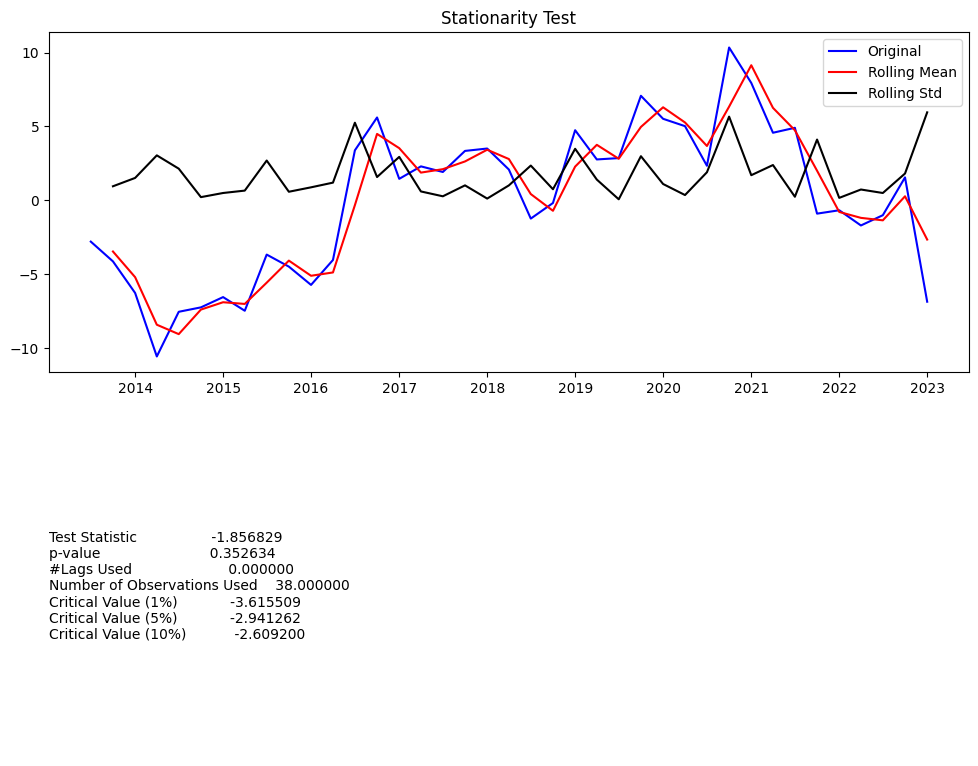

In [118]:
test_stationarity(residuals2)

Results of Dickey-Fuller Test:
Test Statistic                 -3.126679
p-value                         0.024641
#Lags Used                      5.000000
Number of Observations Used    33.000000
Critical Value (1%)            -3.646135
Critical Value (5%)            -2.954127
Critical Value (10%)           -2.615968
dtype: float64


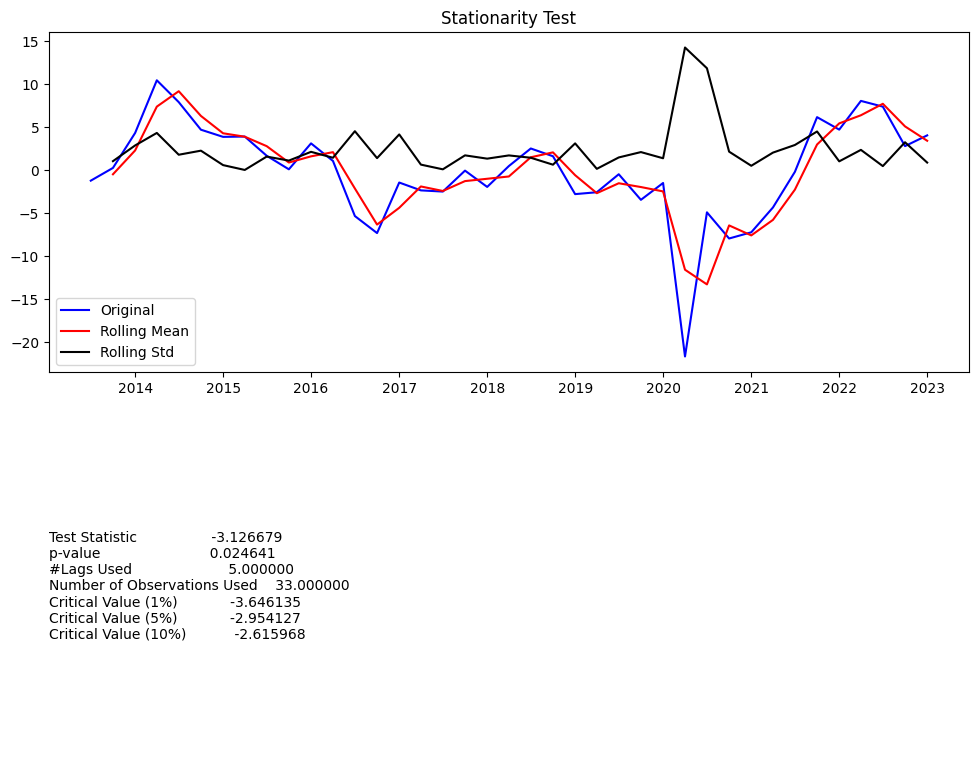

In [119]:
test_stationarity(residuals3)

***The residuals of the best model showed to be stationarity, which support sthe hipothesis of correlation between the indexes***